In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DATASETS/Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(columns='customerID',inplace=True)

In [4]:
pd.get_dummies(df['gender']).head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [5]:
df.drop(columns='gender',axis=1).head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df1 = pd.concat([df.drop('gender',axis=1),
                 pd.get_dummies(df['gender'])],axis=1)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0


In [14]:
dummies = pd.get_dummies(df1['Partner']).head()
dummies

,No,Yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
df2 = pd.concat([df1.drop('Partner',axis=1),
                 pd.get_dummies(df1['Partner'])],axis=1)
df2.head()



,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,No,Yes
0,0,No,1,No,No phone service,DSL,No,Yes,No,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1
1,0,No,34,Yes,No,DSL,Yes,No,Yes,No,...,One year,No,Mailed check,56.95,1889.5,No,0,1,1,0
2,0,No,2,Yes,No,DSL,Yes,Yes,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,1,0
3,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1,1,0
4,0,No,2,Yes,No,Fiber optic,No,No,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,1,0


In [19]:
df2.rename(columns={'Yes': 'Partner_Yes', 'No': 'Partner_No'}, inplace=True)

df2.head()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes
0,0,No,1,No,No phone service,DSL,No,Yes,No,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1
1,0,No,34,Yes,No,DSL,Yes,No,Yes,No,...,One year,No,Mailed check,56.95,1889.5,No,0,1,1,0
2,0,No,2,Yes,No,DSL,Yes,Yes,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,1,0
3,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1,1,0
4,0,No,2,Yes,No,Fiber optic,No,No,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,1,0


In [20]:
dummies = pd.get_dummies(df1['Dependents']).head()
dummies

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [22]:
df3 = pd.concat([df2.drop('Dependents',axis=1),
                 pd.get_dummies(df2['Dependents'])],axis=1)
df3.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes,No,Yes
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,...,Electronic check,29.85,29.85,No,1,0,0,1,1,0
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,...,Mailed check,56.95,1889.5,No,0,1,1,0,1,0
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,...,Mailed check,53.85,108.15,Yes,0,1,1,0,1,0
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,Bank transfer (automatic),42.30,1840.75,No,0,1,1,0,1,0
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,...,Electronic check,70.70,151.65,Yes,1,0,1,0,1,0


In [23]:
df3.rename(columns={'Yes': 'Dependents_Yes', 'No': 'Dependents_No'}, inplace=True)

df3.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,...,Electronic check,29.85,29.85,No,1,0,0,1,1,0
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,...,Mailed check,56.95,1889.5,No,0,1,1,0,1,0
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,...,Mailed check,53.85,108.15,Yes,0,1,1,0,1,0
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,Bank transfer (automatic),42.30,1840.75,No,0,1,1,0,1,0
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,...,Electronic check,70.70,151.65,Yes,1,0,1,0,1,0


In [25]:
dummies = pd.get_dummies(df3['PhoneService']).head()
dummies

,No,Yes
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [26]:
df4 = pd.concat([df3.drop('PhoneService',axis=1),
                 pd.get_dummies(df3['PhoneService'])],axis=1)
df4.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,No,Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,...,29.85,No,1,0,0,1,1,0,1,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,...,1889.5,No,0,1,1,0,1,0,0,1
2,0,2,No,DSL,Yes,Yes,No,No,No,No,...,108.15,Yes,0,1,1,0,1,0,0,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,...,1840.75,No,0,1,1,0,1,0,1,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,...,151.65,Yes,1,0,1,0,1,0,0,1


In [27]:
df4.rename(columns={'Yes': 'PhoneService_Yes', 'No': 'PhoneService_No'}, inplace=True)

df4.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,...,29.85,No,1,0,0,1,1,0,1,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,...,1889.5,No,0,1,1,0,1,0,0,1
2,0,2,No,DSL,Yes,Yes,No,No,No,No,...,108.15,Yes,0,1,1,0,1,0,0,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,...,1840.75,No,0,1,1,0,1,0,1,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,...,151.65,Yes,1,0,1,0,1,0,0,1


In [28]:
dummies = pd.get_dummies(df4['MultipleLines']).head()
dummies

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [29]:
df5 = pd.concat([df4.drop('MultipleLines',axis=1),
                 pd.get_dummies(df4['MultipleLines'])],axis=1)
df5.head()

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,No,No phone service,Yes
0,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,...,0,0,1,1,0,1,0,0,1,0
1,0,34,DSL,Yes,No,Yes,No,No,No,One year,...,1,1,0,1,0,0,1,1,0,0
2,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,...,1,1,0,1,0,0,1,1,0,0
3,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,...,1,1,0,1,0,1,0,0,1,0
4,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,...,0,1,0,1,0,0,1,1,0,0


In [30]:
df5.rename(columns={'Yes': 'MultipleLines_Yes', 'No': 'MultipleLines_No','No phone service':'MultipleLines_NPS'}, inplace=True)

df5.head()

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_NPS,MultipleLines_Yes
0,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,...,0,0,1,1,0,1,0,0,1,0
1,0,34,DSL,Yes,No,Yes,No,No,No,One year,...,1,1,0,1,0,0,1,1,0,0
2,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,...,1,1,0,1,0,0,1,1,0,0
3,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,...,1,1,0,1,0,1,0,0,1,0
4,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,...,0,1,0,1,0,0,1,1,0,0


In [31]:
dummies = pd.get_dummies(df5['InternetService']).head()
dummies

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [32]:
df6 = pd.concat([df5.drop('InternetService',axis=1),
                 pd.get_dummies(df4['InternetService'])],axis=1)
df6.head()

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,...,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_NPS,MultipleLines_Yes,DSL,Fiber optic,No
0,0,1,No,Yes,No,No,No,No,Month-to-month,Yes,...,1,0,1,0,0,1,0,1,0,0
1,0,34,Yes,No,Yes,No,No,No,One year,No,...,1,0,0,1,1,0,0,1,0,0
2,0,2,Yes,Yes,No,No,No,No,Month-to-month,Yes,...,1,0,0,1,1,0,0,1,0,0
3,0,45,Yes,No,Yes,Yes,No,No,One year,No,...,1,0,1,0,0,1,0,1,0,0
4,0,2,No,No,No,No,No,No,Month-to-month,Yes,...,1,0,0,1,1,0,0,0,1,0


In [33]:
df6.rename(columns={'DSL': 'InternetService_DSL', 'Fiber optic': 'InternetService_Fiber optic','No':'InternetService_No'}, inplace=True)
df6.head()

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,...,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_NPS,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,No,Yes,No,No,No,No,Month-to-month,Yes,...,1,0,1,0,0,1,0,1,0,0
1,0,34,Yes,No,Yes,No,No,No,One year,No,...,1,0,0,1,1,0,0,1,0,0
2,0,2,Yes,Yes,No,No,No,No,Month-to-month,Yes,...,1,0,0,1,1,0,0,1,0,0
3,0,45,Yes,No,Yes,Yes,No,No,One year,No,...,1,0,1,0,0,1,0,1,0,0
4,0,2,No,No,No,No,No,No,Month-to-month,Yes,...,1,0,0,1,1,0,0,0,1,0


In [34]:
dummies = pd.get_dummies(df6['OnlineSecurity']).head()
dummies

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [35]:
df7 = pd.concat([df6.drop('OnlineSecurity',axis=1),
                 pd.get_dummies(df6['OnlineSecurity'])],axis=1)
df7.head()

,SeniorCitizen,tenure,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,...,PhoneService_Yes,MultipleLines_No,MultipleLines_NPS,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,No,No internet service,Yes
0,0,1,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,...,0,0,1,0,1,0,0,1,0,0
1,0,34,No,Yes,No,No,No,One year,No,Mailed check,...,1,1,0,0,1,0,0,0,0,1
2,0,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,...,1,1,0,0,1,0,0,0,0,1
3,0,45,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),...,0,0,1,0,1,0,0,0,0,1
4,0,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,...,1,1,0,0,0,1,0,1,0,0


In [39]:
df7.rename(columns={'Yes': 'OnlineSecurity_Yes', 'No': 'OnlineSecurity_No','No internet service':'OnlineSecurity_NPS'}, inplace=True)

df7.head()

,SeniorCitizen,tenure,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,...,PhoneService_Yes,MultipleLines_No,MultipleLines_NPS,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NPS,OnlineSecurity_Yes
0,0,1,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,...,0,0,1,0,1,0,0,1,0,0
1,0,34,No,Yes,No,No,No,One year,No,Mailed check,...,1,1,0,0,1,0,0,0,0,1
2,0,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,...,1,1,0,0,1,0,0,0,0,1
3,0,45,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),...,0,0,1,0,1,0,0,0,0,1
4,0,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,...,1,1,0,0,0,1,0,1,0,0


In [40]:
dummies = pd.get_dummies(df7['OnlineBackup']).head()
dummies

,No,No internet service,Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [41]:
df8 = pd.concat([df7.drop('OnlineBackup',axis=1),
                 pd.get_dummies(df6['OnlineBackup'])],axis=1)
df8.head()

,SeniorCitizen,tenure,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NPS,OnlineSecurity_Yes,No,No internet service,Yes
0,0,1,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,...,0,1,0,0,1,0,0,0,0,1
1,0,34,Yes,No,No,No,One year,No,Mailed check,56.95,...,0,1,0,0,0,0,1,1,0,0
2,0,2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,...,0,1,0,0,0,0,1,0,0,1
3,0,45,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,...,0,1,0,0,0,0,1,1,0,0
4,0,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,...,0,0,1,0,1,0,0,1,0,0


In [42]:
df8.rename(columns={'Yes': 'OnlineBackup_Yes', 'No': 'OnlineBackup_No','No internet service':'OnlineBackup_NIS'}, inplace=True)

df8.head()

,SeniorCitizen,tenure,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NPS,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NIS,OnlineBackup_Yes
0,0,1,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,...,0,1,0,0,1,0,0,0,0,1
1,0,34,Yes,No,No,No,One year,No,Mailed check,56.95,...,0,1,0,0,0,0,1,1,0,0
2,0,2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,...,0,1,0,0,0,0,1,0,0,1
3,0,45,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,...,0,1,0,0,0,0,1,1,0,0
4,0,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,...,0,0,1,0,1,0,0,1,0,0


In [43]:
dummies = pd.get_dummies(df8['DeviceProtection']).head()
dummies

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [44]:
df9 = pd.concat([df8.drop('DeviceProtection',axis=1),
                 pd.get_dummies(df6['DeviceProtection'])],axis=1)
df9.head()

,SeniorCitizen,tenure,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,InternetService_No,OnlineSecurity_No,OnlineSecurity_NPS,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NIS,OnlineBackup_Yes,No,No internet service,Yes
0,0,1,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,...,0,1,0,0,0,0,1,1,0,0
1,0,34,No,No,No,One year,No,Mailed check,56.95,1889.5,...,0,0,0,1,1,0,0,0,0,1
2,0,2,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,...,0,0,0,1,0,0,1,1,0,0
3,0,45,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,...,0,0,0,1,1,0,0,0,0,1
4,0,2,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,...,0,1,0,0,1,0,0,1,0,0


In [45]:
df9.rename(columns={'Yes': 'DeviceProtection_Yes', 'No': 'DeviceProtection_No','No internet service':'DeviceProtection_NIS'}, inplace=True)

df9.head()

,SeniorCitizen,tenure,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,InternetService_No,OnlineSecurity_No,OnlineSecurity_NPS,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NIS,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NIS,DeviceProtection_Yes
0,0,1,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,...,0,1,0,0,0,0,1,1,0,0
1,0,34,No,No,No,One year,No,Mailed check,56.95,1889.5,...,0,0,0,1,1,0,0,0,0,1
2,0,2,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,...,0,0,0,1,0,0,1,1,0,0
3,0,45,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,...,0,0,0,1,1,0,0,0,0,1
4,0,2,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,...,0,1,0,0,1,0,0,1,0,0


In [46]:
dummies = pd.get_dummies(df8['TechSupport']).head()
dummies

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [47]:
df10 = pd.concat([df9.drop('TechSupport',axis=1),
                 pd.get_dummies(df9['TechSupport'])],axis=1)
df10.head()

,SeniorCitizen,tenure,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NIS,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NIS,DeviceProtection_Yes,No,No internet service,Yes
0,0,1,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,...,0,0,0,1,1,0,0,1,0,0
1,0,34,No,No,One year,No,Mailed check,56.95,1889.5,No,...,1,1,0,0,0,0,1,1,0,0
2,0,2,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,...,1,0,0,1,1,0,0,1,0,0
3,0,45,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,...,1,1,0,0,0,0,1,0,0,1
4,0,2,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,...,0,1,0,0,1,0,0,1,0,0


In [48]:
df10.rename(columns={'Yes': 'TechSupport_Yes', 'No': 'TechSupport_No','No internet service':'TechSupport_NIS'}, inplace=True)

df10.head()

,SeniorCitizen,tenure,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NIS,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NIS,DeviceProtection_Yes,TechSupport_No,TechSupport_NIS,TechSupport_Yes
0,0,1,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,...,0,0,0,1,1,0,0,1,0,0
1,0,34,No,No,One year,No,Mailed check,56.95,1889.5,No,...,1,1,0,0,0,0,1,1,0,0
2,0,2,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,...,1,0,0,1,1,0,0,1,0,0
3,0,45,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,...,1,1,0,0,0,0,1,0,0,1
4,0,2,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,...,0,1,0,0,1,0,0,1,0,0


In [49]:
dummies = pd.get_dummies(df10['StreamingTV']).head()
dummies

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [50]:
df11 = pd.concat([df10.drop('StreamingTV',axis=1),
                 pd.get_dummies(df10['StreamingTV'])],axis=1)
df11.head()

,SeniorCitizen,tenure,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,...,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NIS,DeviceProtection_Yes,TechSupport_No,TechSupport_NIS,TechSupport_Yes,No,No internet service,Yes
0,0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,...,1,1,0,0,1,0,0,1,0,0
1,0,34,No,One year,No,Mailed check,56.95,1889.5,No,0,...,0,0,0,1,1,0,0,1,0,0
2,0,2,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,...,1,1,0,0,1,0,0,1,0,0
3,0,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,...,0,0,0,1,0,0,1,1,0,0
4,0,2,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,...,0,1,0,0,1,0,0,1,0,0


In [51]:
df11.rename(columns={'Yes': 'StreamingTV_Yes', 'No': 'StreamingTV_No','No internet service':'StreamingTV_NIS'}, inplace=True)

df11.head()

,SeniorCitizen,tenure,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,...,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NIS,DeviceProtection_Yes,TechSupport_No,TechSupport_NIS,TechSupport_Yes,StreamingTV_No,StreamingTV_NIS,StreamingTV_Yes
0,0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,...,1,1,0,0,1,0,0,1,0,0
1,0,34,No,One year,No,Mailed check,56.95,1889.5,No,0,...,0,0,0,1,1,0,0,1,0,0
2,0,2,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,...,1,1,0,0,1,0,0,1,0,0
3,0,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,...,0,0,0,1,0,0,1,1,0,0
4,0,2,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,...,0,1,0,0,1,0,0,1,0,0


In [52]:
dummies = pd.get_dummies(df11['StreamingMovies']).head()
dummies

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [53]:
df12 = pd.concat([df11.drop('StreamingMovies',axis=1),
                 pd.get_dummies(df11['StreamingMovies'])],axis=1)
df12.head()

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_NIS,TechSupport_Yes,StreamingTV_No,StreamingTV_NIS,StreamingTV_Yes,No,No internet service,Yes
0,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,34,One year,No,Mailed check,56.95,1889.5,No,0,1,...,1,1,0,0,1,0,0,1,0,0
2,0,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1,...,1,0,0,1,1,0,0,1,0,0
4,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,...,0,1,0,0,1,0,0,1,0,0


In [54]:
df12.rename(columns={'Yes': 'StreamingMovies_Yes', 'No': 'StreamingMovies_No','No internet service':'StreamingMovies_NIS'}, inplace=True)

df12.head()

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_NIS,TechSupport_Yes,StreamingTV_No,StreamingTV_NIS,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NIS,StreamingMovies_Yes
0,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,34,One year,No,Mailed check,56.95,1889.5,No,0,1,...,1,1,0,0,1,0,0,1,0,0
2,0,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1,...,1,0,0,1,1,0,0,1,0,0
4,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,...,0,1,0,0,1,0,0,1,0,0


In [56]:
dummies = pd.get_dummies(df12['Contract']).head()
dummies

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [57]:
df13 = pd.concat([df12.drop('Contract',axis=1),
                 pd.get_dummies(df12['Contract'])],axis=1)
df13.head()

,SeniorCitizen,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,...,TechSupport_Yes,StreamingTV_No,StreamingTV_NIS,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NIS,StreamingMovies_Yes,Month-to-month,One year,Two year
0,0,1,Yes,Electronic check,29.85,29.85,No,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,34,No,Mailed check,56.95,1889.5,No,0,1,1,...,0,1,0,0,1,0,0,0,1,0
2,0,2,Yes,Mailed check,53.85,108.15,Yes,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,0,45,No,Bank transfer (automatic),42.30,1840.75,No,0,1,1,...,1,1,0,0,1,0,0,0,1,0
4,0,2,Yes,Electronic check,70.70,151.65,Yes,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [58]:
df13.rename(columns={'Month-to-month': 'ContractM_t_M', 'One year': 'Contract_oy','Two year':'Contract_ty'}, inplace=True)

df13.head()

,SeniorCitizen,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,...,TechSupport_Yes,StreamingTV_No,StreamingTV_NIS,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NIS,StreamingMovies_Yes,ContractM_t_M,Contract_oy,Contract_ty
0,0,1,Yes,Electronic check,29.85,29.85,No,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,34,No,Mailed check,56.95,1889.5,No,0,1,1,...,0,1,0,0,1,0,0,0,1,0
2,0,2,Yes,Mailed check,53.85,108.15,Yes,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,0,45,No,Bank transfer (automatic),42.30,1840.75,No,0,1,1,...,1,1,0,0,1,0,0,0,1,0
4,0,2,Yes,Electronic check,70.70,151.65,Yes,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [59]:
dummies = pd.get_dummies(df13['PaperlessBilling']).head()
dummies

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [60]:
df14 = pd.concat([df13.drop('PaperlessBilling',axis=1),
                 pd.get_dummies(df13['PaperlessBilling'])],axis=1)
df14.head()

,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes,...,StreamingTV_NIS,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NIS,StreamingMovies_Yes,ContractM_t_M,Contract_oy,Contract_ty,No,Yes
0,0,1,Electronic check,29.85,29.85,No,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,34,Mailed check,56.95,1889.5,No,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,2,Mailed check,53.85,108.15,Yes,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,45,Bank transfer (automatic),42.30,1840.75,No,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
4,0,2,Electronic check,70.70,151.65,Yes,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [61]:
df14.rename(columns={'Yes': 'PaperlessBilling_Yes', 'No': 'PaperlessBilling_No'}, inplace=True)

df14.head()

,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes,...,StreamingTV_NIS,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NIS,StreamingMovies_Yes,ContractM_t_M,Contract_oy,Contract_ty,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1,Electronic check,29.85,29.85,No,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,34,Mailed check,56.95,1889.5,No,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,2,Mailed check,53.85,108.15,Yes,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,45,Bank transfer (automatic),42.30,1840.75,No,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
4,0,2,Electronic check,70.70,151.65,Yes,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [63]:
dummies = pd.get_dummies(df14['PaymentMethod']).head()
dummies

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [64]:
df15 = pd.concat([df14.drop('PaymentMethod',axis=1),
                 pd.get_dummies(df14['PaymentMethod'])],axis=1)
df15.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,ContractM_t_M,Contract_oy,Contract_ty,PaperlessBilling_No,PaperlessBilling_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,29.85,29.85,No,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.5,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [65]:
Churn = 'Churn'
df15[Churn].replace({'No': 0,'Yes': 1}, inplace=True)
df15.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Female,Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,ContractM_t_M,Contract_oy,Contract_ty,PaperlessBilling_No,PaperlessBilling_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.5,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [67]:
df15.drop(columns=['TotalCharges'], inplace=True)

In [68]:
df15.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Female,Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,ContractM_t_M,Contract_oy,Contract_ty,PaperlessBilling_No,PaperlessBilling_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [69]:
column_names = df15.columns.tolist()
print(column_names)


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'Female', 'Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_NPS', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_NPS', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_NIS', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_NIS', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_NIS', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_NIS', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_NIS', 'StreamingMovies_Yes', 'ContractM_t_M', 'Contract_oy', 'Contract_ty', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


In [70]:
df15 = df15[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Female', 'Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_NPS', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_NPS', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_NIS', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_NIS', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_NIS', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_NIS', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_NIS', 'StreamingMovies_Yes', 'ContractM_t_M', 'Contract_oy', 'Contract_ty', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check', 'Churn']]
df15

,SeniorCitizen,tenure,MonthlyCharges,Female,Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,ContractM_t_M,Contract_oy,Contract_ty,PaperlessBilling_No,PaperlessBilling_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Churn
0,0,1,29.85,1,0,0,1,1,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,0,1,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
7039,0,72,103.20,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
7040,0,11,29.60,1,0,0,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
7041,1,4,74.40,0,1,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,1


In [71]:
df15 = df15.sample(frac=1,random_state=1)
df15

,SeniorCitizen,tenure,MonthlyCharges,Female,Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,ContractM_t_M,Contract_oy,Contract_ty,PaperlessBilling_No,PaperlessBilling_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Churn
3381,0,41,79.85,1,0,1,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
6180,1,66,102.40,1,0,1,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
4829,0,12,45.00,1,0,1,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
3737,0,5,50.60,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
4249,0,10,65.90,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1,9,100.50,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
5192,0,60,19.95,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3980,0,28,105.70,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
235,0,2,54.40,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1


In [72]:
from sklearn.preprocessing import RobustScaler

In [73]:
new_df = df15.copy()

In [74]:
new_df['tenure'] = RobustScaler().fit_transform(new_df['tenure'].to_numpy().reshape(-1,1))
tenure = new_df['tenure']

In [75]:
new_df['MonthlyCharges'] = RobustScaler().fit_transform(new_df['MonthlyCharges'].to_numpy().reshape(-1,1))
MonthlyCharges = new_df['MonthlyCharges']

In [83]:
new_df.drop(columns=['tenure'], inplace=True)

In [84]:
new_df.drop(columns=['MonthlyCharges'], inplace=True)

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Female'}>,
        <Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'Partner_No'}>,
        <Axes: title={'center': 'Partner_Yes'}>,
        <Axes: title={'center': 'Dependents_No'}>,
        <Axes: title={'center': 'Dependents_Yes'}>],
       [<Axes: title={'center': 'PhoneService_No'}>,
        <Axes: title={'center': 'PhoneService_Yes'}>,
        <Axes: title={'center': 'MultipleLines_No'}>,
        <Axes: title={'center': 'MultipleLines_NPS'}>,
        <Axes: title={'center': 'MultipleLines_Yes'}>,
        <Axes: title={'center': 'InternetService_DSL'}>,
        <Axes: title={'center': 'InternetService_Fiber optic'}>],
       [<Axes: title={'center': 'InternetService_No'}>,
        <Axes: title={'center': 'OnlineSecurity_No'}>,
        <Axes: title={'center': 'OnlineSecurity_NPS'}>,
        <Axes: title={'center': 'OnlineSecurity_Yes'}>,
        <Axes: title={'center': 'OnlineBackup

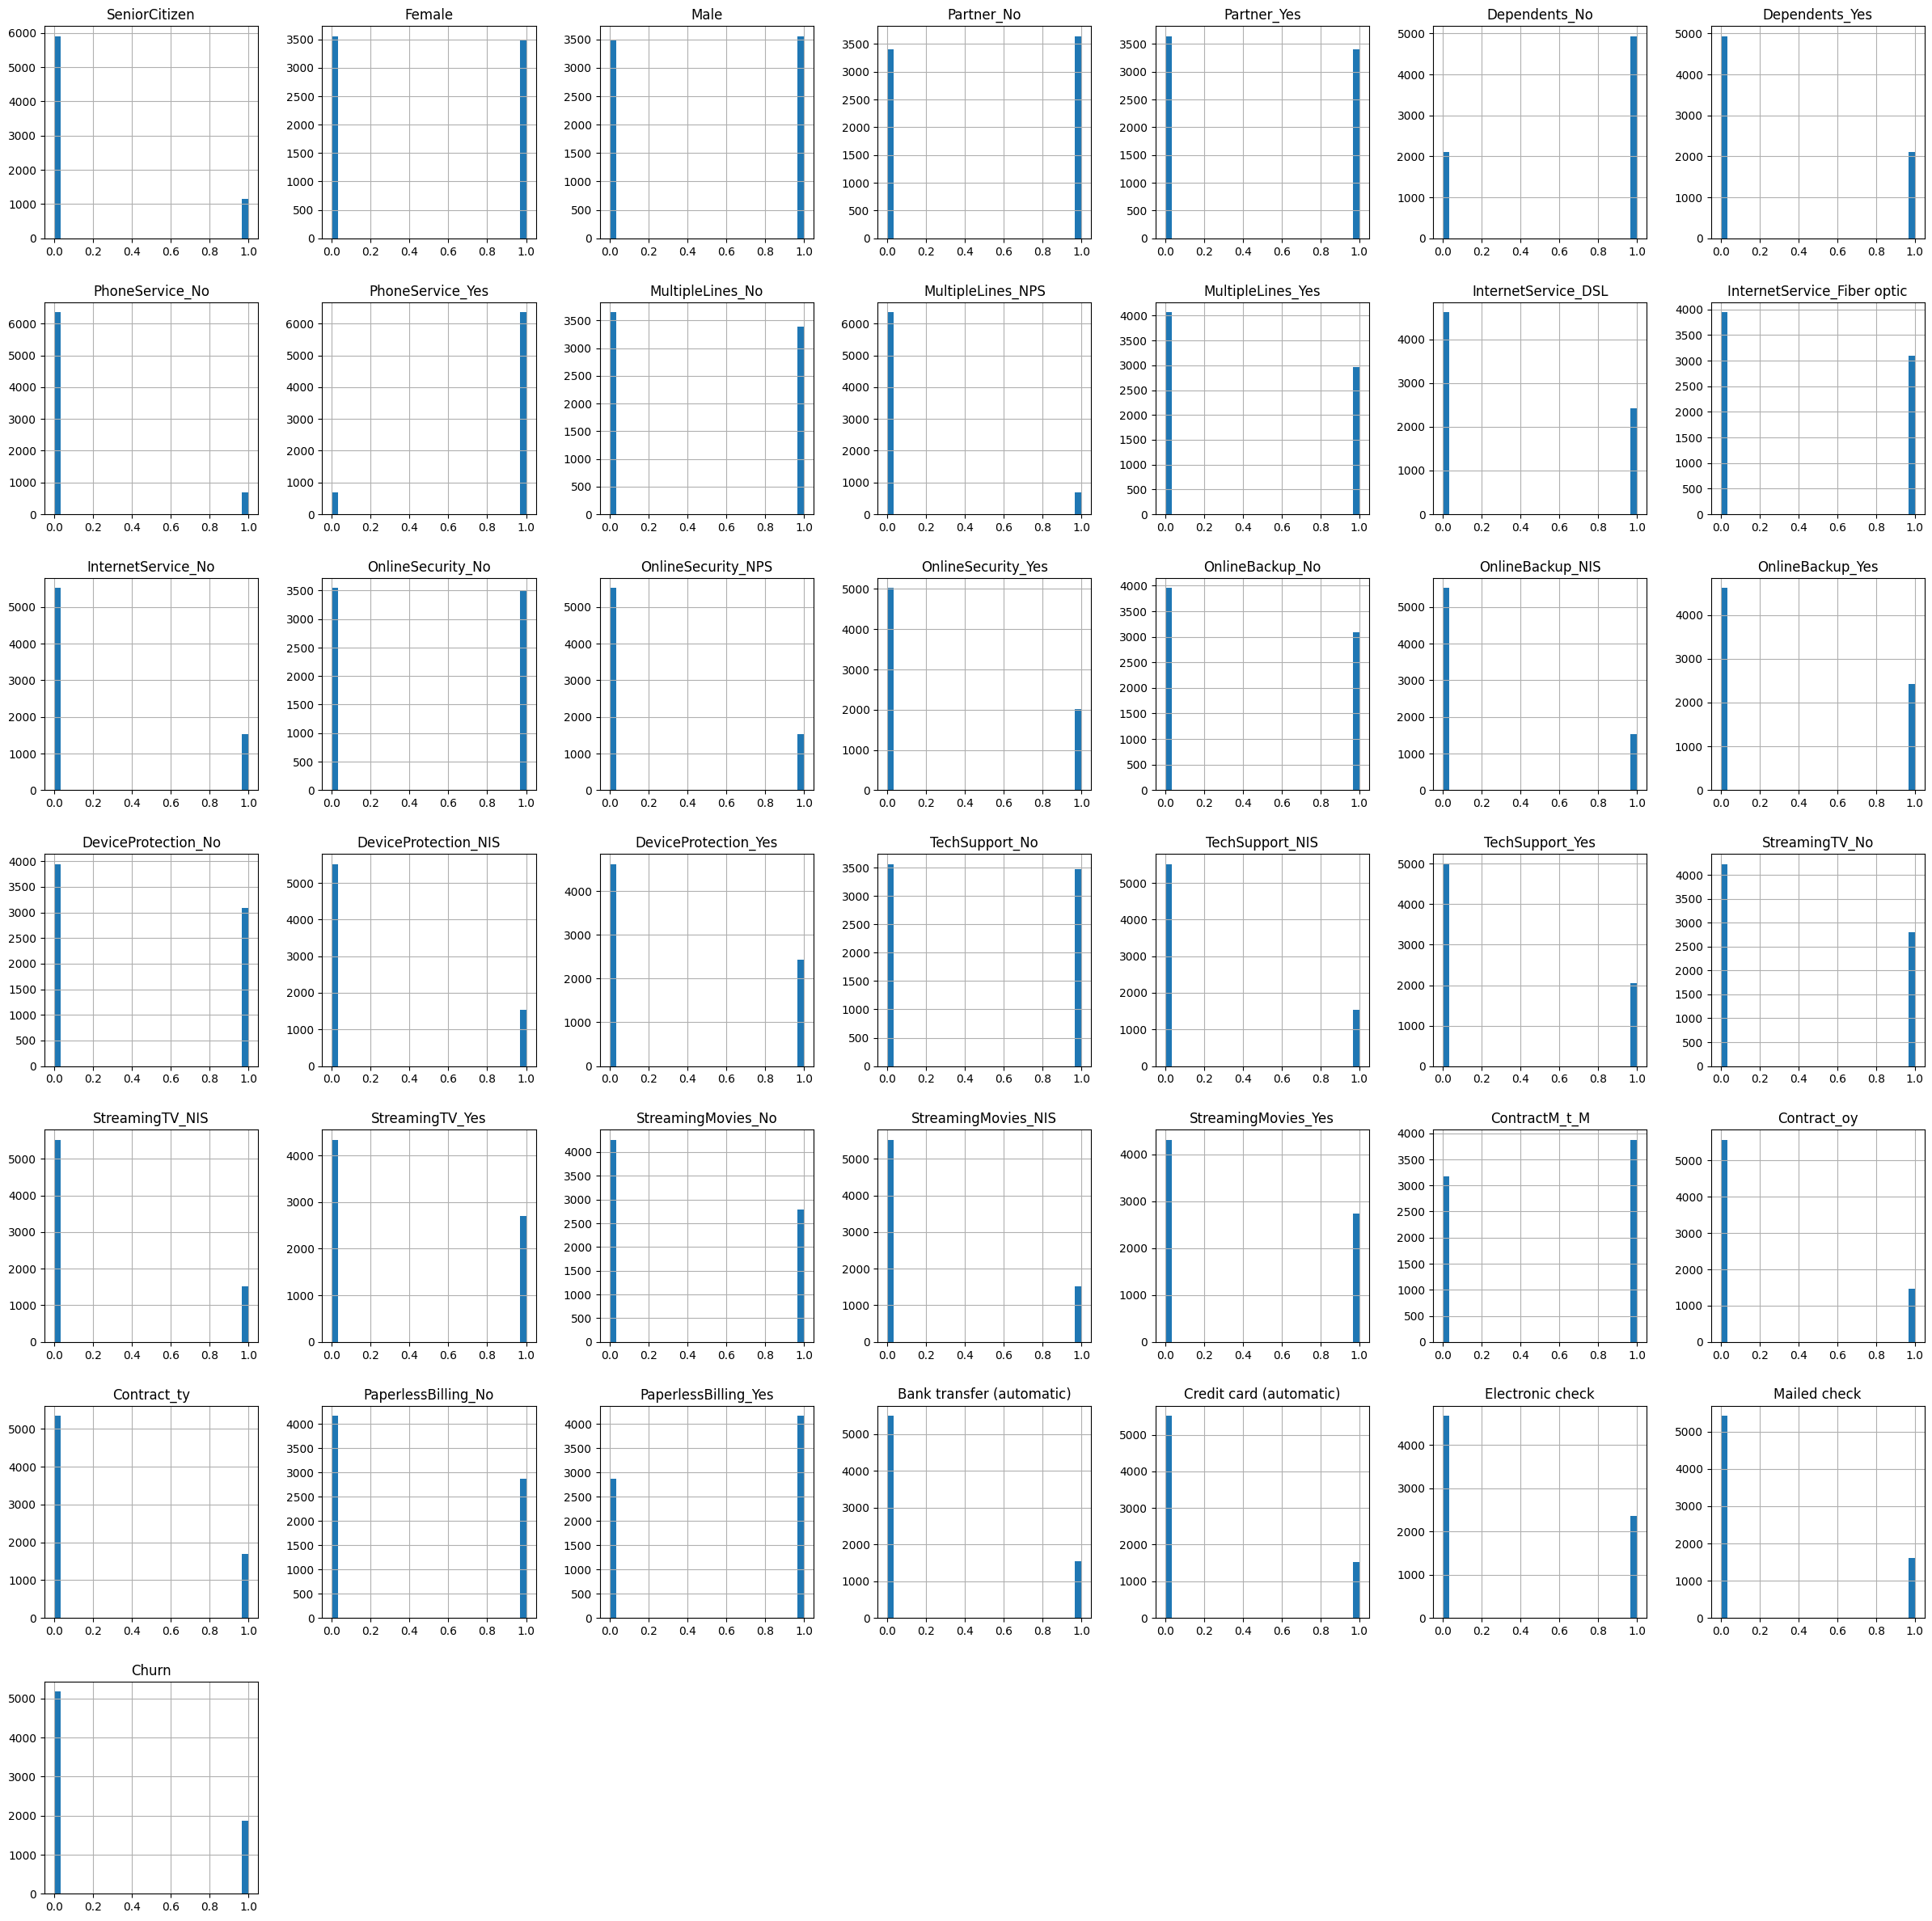

In [85]:
new_df.hist(bins=30,figsize=(30,30))

In [86]:
train, test, val = new_df[:5635], new_df[5635:6339], new_df[6339:]
train['Churn'].value_counts(), test['Churn'].value_counts(), val['Churn'].value_counts()

(0    4146
 1    1489
 Name: Churn, dtype: int64,
 0    528
 1    176
 Name: Churn, dtype: int64,
 0    500
 1    204
 Name: Churn, dtype: int64)

In [87]:
import numpy as np

In [88]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((5635, 43), (704, 43), (704, 43))

In [89]:
x_train,y_train = train_np[:,:-1],train_np[:,-1]
x_test,y_test = test_np[:,:-1],test_np[:,-1]
x_val,y_val = val_np[:,:-1],val_np[:,-1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


((5635, 42), (5635,), (704, 42), (704,), (704, 42), (704,))

In [90]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
logistic_model.score(x_test,y_test)

0.78125